<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.


## Questions to investigate 

>   1. Find corelation between the trend of casualities in mass shootings vs Total Count by states from 2015 to 2016 ?
>   2. What census data is most associated with high gun per capita?
>   3. Which states have had the highest growth in gun registrations?
>   4. What is the overall trend of gun purchases?

<a id='wrangling'></a>
## Data Loading

> **will import the required libraries, and load files into dataframs **


In [1]:
# cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

gun_df = pd.read_excel('Database_Ncis_and_Census_data/gun_data.xlsx')
census_df = pd.read_csv('Database_Ncis_and_Census_data/US_Census_Data.csv')

<a id='wrangling'></a>
## Data Wrangling


## First Step

> **will start a general dataframe checking to detect data that needs to be cleaned, modified or merged**


In [2]:
# check the data types of variables in the gun dataset
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [3]:
# check the data type of variables in the census dataset
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [4]:
# check for any duplicated rows in both datasets
sum(gun_df.duplicated())

0

In [5]:
# check for any duplicated rows in both datasets
sum(census_df.duplicated())

3

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
census_df.tail(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
gun_df.tail(20)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12465,1998-11,North Carolina,524.0,NaN,87.0,695.0,NaN,4,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1310
12466,1998-11,North Dakota,0.0,NaN,20.0,38.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
12467,1998-11,Ohio,0.0,NaN,502.0,434.0,NaN,16,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,952
12468,1998-11,Oklahoma,0.0,NaN,259.0,361.0,NaN,13,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,633
12469,1998-11,Oregon,0.0,NaN,153.0,186.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344
12470,1998-11,Pennsylvania,0.0,NaN,5.0,8.0,NaN,4,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
12471,1998-11,Puerto Rico,0.0,NaN,1.0,1.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
12472,1998-11,Rhode Island,0.0,NaN,13.0,23.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
12473,1998-11,South Carolina,0.0,NaN,0.0,6.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
12474,1998-11,South Dakota,0.0,NaN,8.0,66.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74


In [8]:
# Check for null values in this DF
census_df.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [9]:
# Check for null values in this DF
gun_df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

### Checking Result
> **Dataframe:   gun_df**

>1. There are some empty cells of values
>2. The month column contains a month and a year
>3. The month column is of object, not date

> **Dataframe:   census_df**

>1. There are some duplicates in the data
>2. There are some rows with NaN values

### Second Step
> 1. Copy the Dataframe to keep them just in case.
> 2. Clean, Drop, and Fill in data
> 3. Spilt Month column to Year and Months columns.
> 4. Convert data type from string to float for all the state column in census_df_copy


In [10]:
# copy the datasets JUST IN CASE
census_df_copy = census_df.copy()
gun_df_copy = gun_df.copy()

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

census_df_copy.drop('Fact Note',inplace=True,axis=1)
census_df_copy.drop(census_df_copy.index[64:],inplace=True,axis=0)

In [12]:
# Check for null values in this DF
census_df_copy.isnull().sum()

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


In [13]:
gun_df_copy.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [14]:
# Replace the Nan field with mean of each column for gun data
gun_df_copy.fillna(gun_df_copy.mean(),inplace=True)

In [15]:
# Check for null values in this df after cleaning
gun_df_copy.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [16]:
gun_df_copy.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [17]:
#Extract Year and months column based on Month in Gun data
gun_df_copy['date'] = pd.to_datetime(gun_df_copy['month'])

In [18]:
gun_df_copy['year']=gun_df_copy['month'].apply(lambda x: x.split("-")[0]).astype(int)
gun_df_copy['year'].unique()


array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [19]:
gun_df_copy['month']=gun_df_copy['month'].apply(lambda x: x.split("-")[1]).astype(int)
gun_df_copy['month'].unique()


array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

In [20]:
census_df_copy.columns

Index(['Fact', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [21]:
# Get a list of all the column names in census_df_copy except for the first column 'Fact'
states = census_df_copy.columns.drop('Fact')
states

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [22]:
#Convert data type from string to float for all the state column in census_df_copy
for state in states:
    census_df_copy[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    census_df_copy[state]=pd.to_numeric(census_df_copy[state], downcast='float', errors='ignore')

census_df_copy

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250016.0,5540545.0,3576452.0,952065.0,20612440.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,"Population estimates base, April 1, 2010, (V2...",4780131.0,710249.0,6392301.0,2916025.0,37254520.0,5029324.0,3574114.0,897936.0,18804592.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,"Population, percent change - April 1, 2010 (es...",170.0,450.0,840.0,250.0,540.0,1020.0,10.0,600.0,960.0,...,63.0,48.0,1080.0,1040.0,20.0,510.0,840.0,120.0,160.0,390.0
3,"Population, Census, April 1, 2010",4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,...,814180.0,6346105.0,25145560.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0
4,"Persons under 5 years, percent, July 1, 2016, ...",600.0,730.0,630.0,640.0,630.0,610.0,520.0,580.0,550.0,...,71.0,61.0,720.0,830.0,490.0,610.0,620.0,550.0,580.0,650.0
5,"Persons under 5 years, percent, April 1, 2010",640.0,760.0,710.0,680.0,680.0,680.0,570.0,620.0,570.0,...,73.0,64.0,770.0,950.0,510.0,640.0,650.0,560.0,630.0,710.0
6,"Persons under 18 years, percent, July 1, 2016,...",2260.0,2520.0,2350.0,2360.0,2320.0,2280.0,2110.0,2150.0,2010.0,...,246.0,226.0,2620.0,3020.0,1900.0,2220.0,2240.0,2050.0,2230.0,2370.0
7,"Persons under 18 years, percent, April 1, 2010",2370.0,2640.0,2550.0,2440.0,2500.0,2440.0,2290.0,2290.0,2130.0,...,249.0,236.0,2730.0,3150.0,2070.0,2320.0,2350.0,2090.0,2360.0,2400.0
8,"Persons 65 years and over, percent, July 1, 2...",1610.0,1040.0,1690.0,1630.0,1360.0,1340.0,1610.0,1750.0,1990.0,...,16.0,157.0,1200.0,1050.0,1810.0,1460.0,1480.0,1880.0,1610.0,1500.0
9,"Persons 65 years and over, percent, April 1, 2010",1380.0,770.0,1380.0,1440.0,1140.0,1090.0,1420.0,1440.0,1730.0,...,143.0,134.0,1030.0,900.0,1460.0,1220.0,1230.0,1600.0,1370.0,1240.0


In [23]:
cols = ['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other']

gun_df_copy[cols] = gun_df_copy[cols].applymap(np.int64)
gun_df_copy

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,date,year
0,9,Alabama,16717,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,2017-09-01,2017
1,9,Alaska,209,2,2320,2930,219,160,0,5,...,0,17,24,1,0,0,0,6303,2017-09-01,2017
2,9,Arizona,5069,382,11063,7946,920,631,0,13,...,0,38,12,2,0,0,0,28394,2017-09-01,2017
3,9,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,13,23,0,0,2,1,17747,2017-09-01,2017
4,9,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,123506,2017-09-01,2017
5,9,Colorado,4356,0,15751,13448,1007,1062,0,0,...,0,0,0,0,0,0,0,35873,2017-09-01,2017
6,9,Connecticut,4343,673,4834,1993,274,0,0,0,...,0,0,0,0,0,0,0,12117,2017-09-01,2017
7,9,Delaware,275,0,1414,1538,66,68,0,0,...,0,55,34,3,1,2,0,3502,2017-09-01,2017
8,9,District of Columbia,1,0,56,4,0,0,0,0,...,0,0,0,0,0,0,0,61,2017-09-01,2017
9,9,Florida,10784,0,39199,17949,2319,1721,1,18,...,0,11,9,0,0,1,0,77390,2017-09-01,2017


In [24]:
# group the data by state and sum the total number of guns
gun_totals_by_state = gun_df_copy.groupby("state")["totals"].sum()

In [25]:
gun_totals_by_state = gun_totals_by_state.to_frame()


<a id='eda'></a>
## Exploratory Data Analysis

>**This code is performing Exploratory Data Analysis (EDA) on gun ownership data**

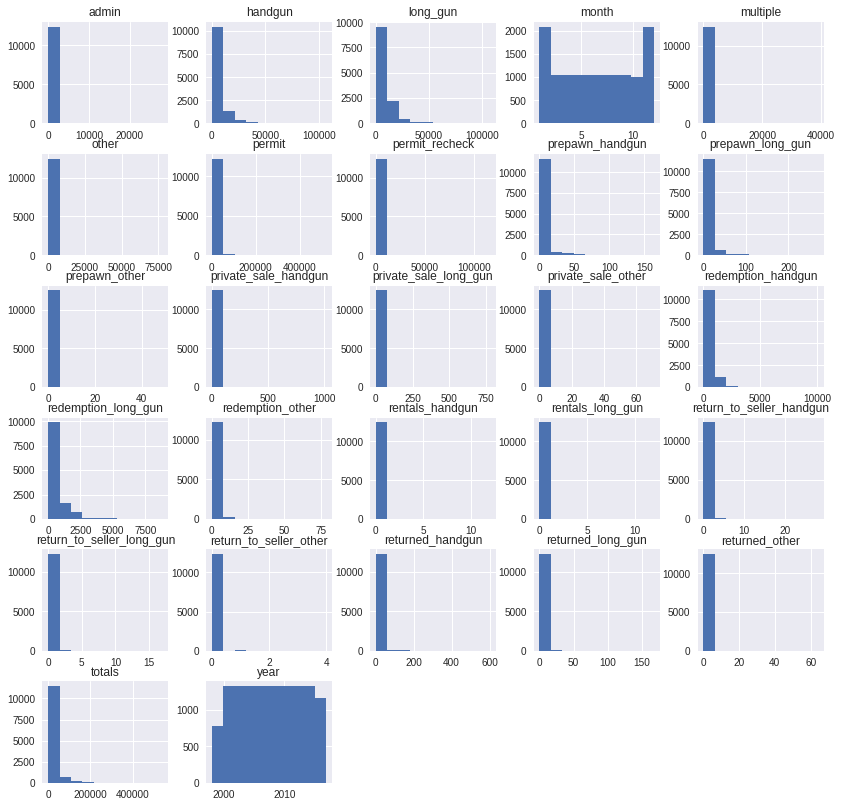

In [89]:
gun_df_copy.hist(figsize=(14,14))
plt.show()

,permit
count,12485.000000
mean,6413.628194
std,23729.495816
min,0.000000
25%,0.000000
50%,522.000000
75%,4338.000000
max,522188.000000


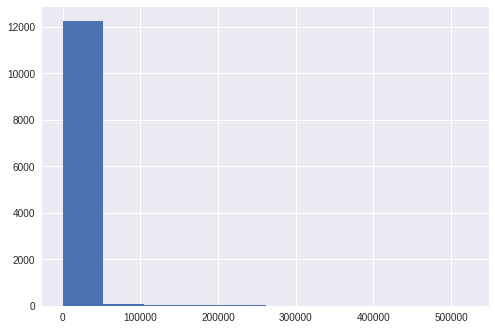

In [96]:
#generate a histogram and summary statistics for the 'permit' column in the gun_df_copy dataframe. 
permits = gun_df_copy['permit'].hist()
pd.DataFrame(gun_df_copy['permit'].describe())

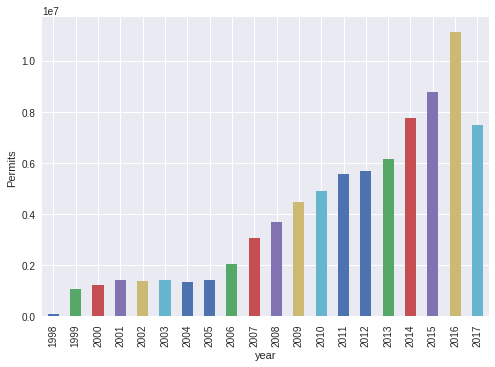

In [103]:
#group the data by year and calculates the sum of the 'permit' column for each year. 
year_permits = gun_df_copy.groupby('year')['permit'].sum().plot(kind='bar').set_ylabel('Permits')

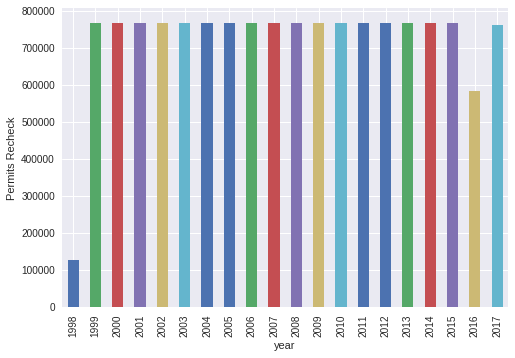

In [102]:
#groups the data by year and calculates the sum of the 'permit_recheck' column for each year. 
year_recheck = gun_df_copy.groupby('year')['permit_recheck'].sum().plot(kind='bar').set_ylabel('Permits Recheck')

Text(0,0.5,'Permits VS Recheck')

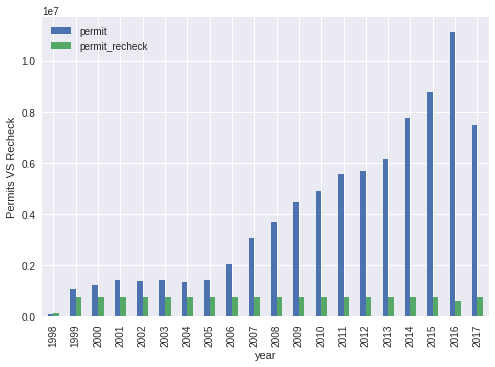

In [101]:
#group the data by year and calculates the sum of the 'permit' and 'permit_recheck' columns for each year. 
permit_vs_recheck = gun_df_copy.groupby('year')['permit','permit_recheck'].sum().plot(kind='bar').set_ylabel('Permits VS Recheck')
permit_vs_recheck

### Research Question 1  (What census data is most associated with high gun per capita?)

### Solution Process

> In order to determine the correlation between census data and gun per capita, we first calculate the gun per capita by dividing the total number of guns by the population. Next, we create a correlation matrix between the gun per capita and selected census data columns. This matrix shows the correlation coefficients between the gun per capita and each of the selected census data columns. A coefficient of 1.0 means there is a perfect positive correlation, a coefficient of -1.0 means there is a perfect negative correlation, and a coefficient of 0.0 means there is no correlation.


In [28]:
#This code sets the index of the dataframe census_df_copy to the 'Fact' column and transposes the dataframe.
census_df_copy.set_index('Fact',inplace=True)
df_census_T = census_df_copy.T.reset_index()


In [29]:
df_census_T.rename(columns={'index':'state'},inplace = True)

#Get subset data for 2016 and 2010
df_gun_16=gun_df_copy[gun_df_copy['year'] == 2016]
df_gun_10=gun_df_copy[gun_df_copy['year'] == 2010]

#Group by gun data by state and gun totals for 2010 and 2016 
guntotal_16= df_gun_16.groupby(['state'])['totals'].sum().reset_index()
guntotal_10= df_gun_10.groupby(['state'])['totals'].sum().reset_index()
 
#Rename the dataset to represent different time point 
guntotal_16.rename(columns={'totals':'2016_totals'},inplace = True)
guntotal_10.rename(columns={'totals':'2010_totals'},inplace = True)

#Merge 2010 and 2016 gun data summary 
guntotal = guntotal_16.merge(guntotal_10, on='state', how='inner')

#Merge gun and census data with inner join, by state column 
result = guntotal.merge(df_census_T, on='state', how='inner')

#calculate Gun_Per_Capital for 2016
result['Gun_Per_Capital_2016'] = result['2016_totals']/result['Population estimates, July 1, 2016,  (V2016)']

#calculate Gun_Per_Capital for 2010
result['Gun_Per_Capital_2010'] = result['2010_totals']/result['Population estimates base, April 1, 2010,  (V2016)']

#Top 5  the highest state per capital on 2010
result.nlargest(5,'Gun_Per_Capital_2010')

,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",Gun_Per_Capital_2016,Gun_Per_Capital_2010
16,Kentucky,3676847,2385579,4436974.0,4339344.0,220.0,4339367.0,620.0,650.0,2280.0,...,184154.0,106011.0,27258.0,296155.0,33208.0,282704.0,1099.0,3948634.0,0.828683,0.549756
43,Utah,294907,553134,3051217.0,2763888.0,1040.0,2763885.0,830.0,950.0,3020.0,...,132163.0,76269.0,24423.0,218826.0,18754.0,219807.0,336.0,8216962.0,0.096652,0.200129
25,Montana,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,55913.0,35449.0,5578.0,102746.0,11486.0,93393.0,68.0,14554580.0,0.130776,0.102177
1,Alaska,87647,65909,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,0.118140,0.092797
47,West Virginia,242350,159550,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,63112.0,39065.0,5777.0,104785.0,12912.0,94960.0,771.0,2403821.0,0.132352,0.086103


White alone, percent, July 1, 2016,  (V2016)


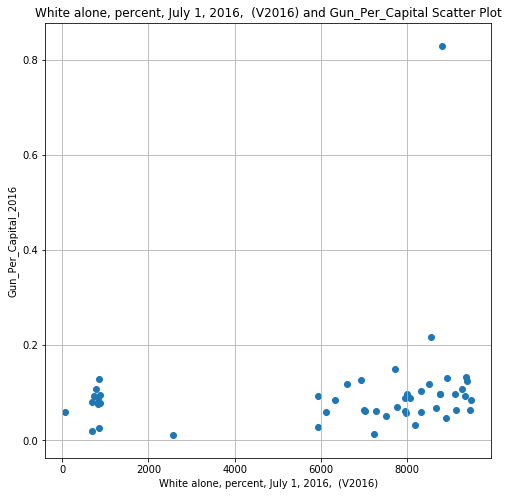

Persons 65 years and over, percent, April 1, 2010


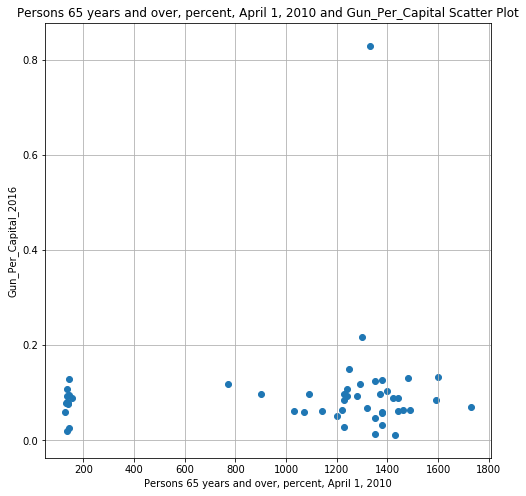

Owner-occupied housing unit rate, 2011-2015


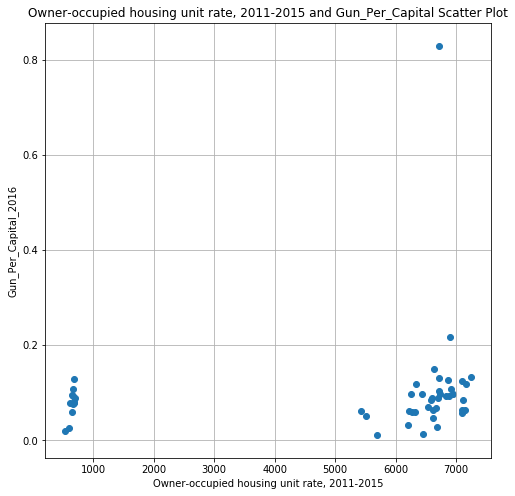

Asian alone, percent, July 1, 2016,  (V2016)


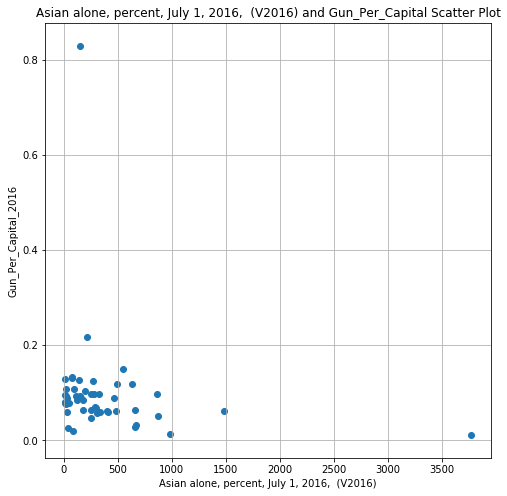

Foreign born persons, percent, 2011-2015


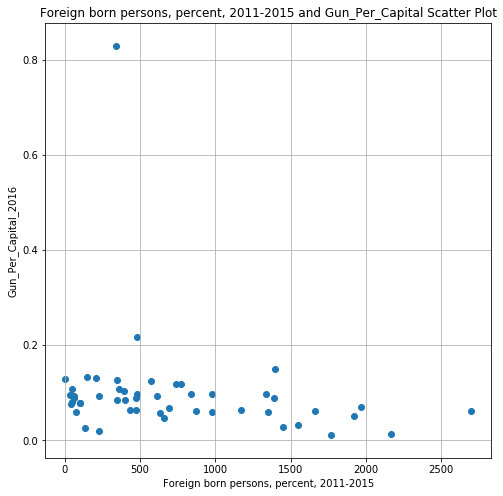

Median gross rent, 2011-2015


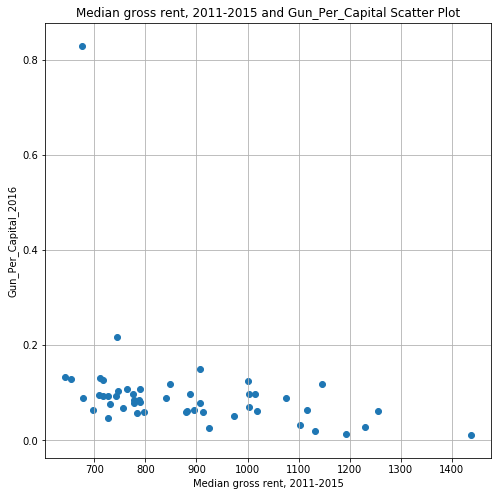

In [30]:
fact = result.drop(['Gun_Per_Capital_2010','state','2016_totals','2010_totals'],axis=1)


imp =['White alone, percent, July 1, 2016,  (V2016)',
    'Persons 65 years and over, percent, April 1, 2010',
    'Owner-occupied housing unit rate, 2011-2015',
    'Asian alone, percent, July 1, 2016,  (V2016)',
    'Foreign born persons, percent, 2011-2015', 
    'Median gross rent, 2011-2015']

for col in imp:
    plt.figure(figsize=(8,8))
    print(col)
    plt.scatter(fact[col],fact['Gun_Per_Capital_2016'], label =col)
    plt.title(col+" and Gun_Per_Capital Scatter Plot")     
    plt.ylabel("Gun_Per_Capital_2016")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

#### Results for Question 1
>Upon analyzing the correlation matrix, we found weak associations between the census variables and gun per capita. The positive association between gun per capita and the variables include White alone percent, Persons 65 years and over percent, and owner-occupied housing unit rate. On the other hand, the negative association between gun per capita and variables include Asian alone percent, Foreign born persons percent, and Median gross rent.

###  Research Question 2 How much have firearm background checks grown since 1999?

## Solution Process

>For this visualization, I will groupe all of the states together and summed up the total checks per state since 1998

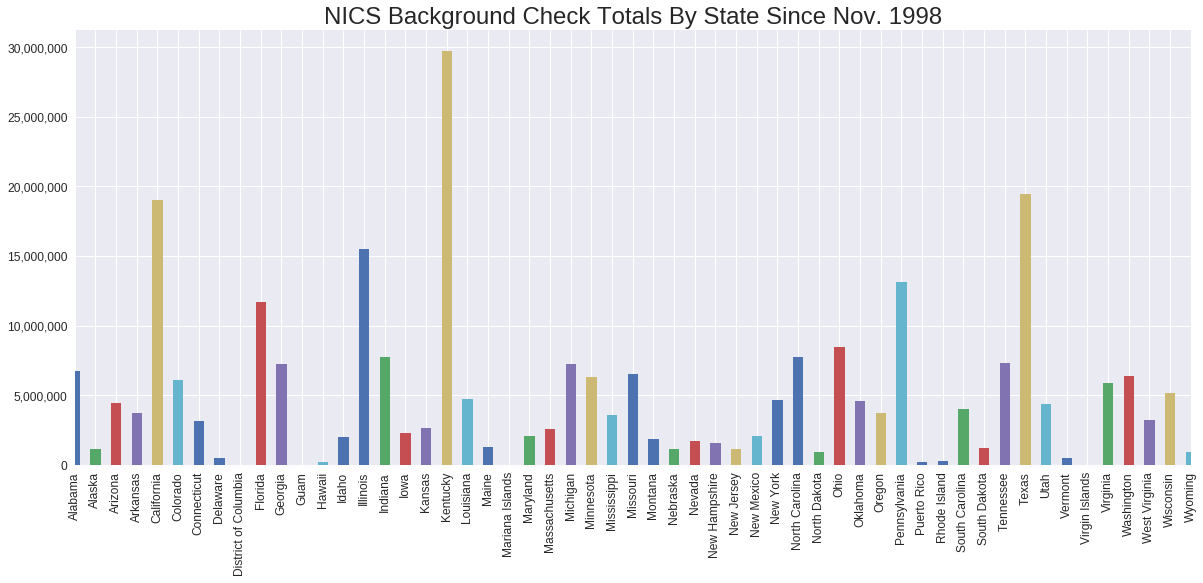

In [32]:
# get the total checks by each state and each month
checks_by_state = gun_df_copy.groupby(['state', 'month'])['totals'].sum().reset_index()

# group the states and sum the totals
state_totals = checks_by_state.groupby('state')['totals'].sum()

# plot graph
state_total_tick_placement = pd.np.arange(len(state_totals))
plt.style.use('seaborn')
state_ax = state_totals.plot(kind='bar',figsize=(20,8))

state_ax.set_title("NICS Background Check Totals By State Since Nov. 1998", fontsize=24)
state_ax.set_yticklabels([ "{0:,.0f}".format(y) for y in state_ax.get_yticks() ], fontsize=12);
plt.setp(state_ax.get_xticklabels(), fontsize=12)
state_ax.set_xticks(state_total_tick_placement)
state_ax.set_xticklabels(state_totals.index)
state_ax.set_xlim(0, len(state_totals) - 1)
state_ax.set_xlabel("")
plt.show()


#### Results for Question 2
>As the graph illustrates, Kentucky has the highest rate of background checks for guns since 1998. This can be attributed to the state's relatively lenient gun control laws compared to other states. For example, in Kentucky, there is no state permit required for purchasing firearms, no registration required for firearms, no laws regarding assault weapons or magazine capacity restrictions, and no owner license required. Additionally, background checks for private sales are not mandatory, and concealed carry laws have been relaxed. On March 16, 2011, a change to the Kentucky Revised Statutes § 527.020 was signed into law by Governor Steve Beshear, allowing for guns to be carried without a permit in any factory-installed compartment within the passenger area of a vehicle. Prior to this change, this type of carry was only allowed in a glove compartment.

### Research Question 3  (Which states have had the highest growth in gun registrations?)

## Solution Process

>I will calculate the increasing percentage of gun registrations from 2010 to 2016, then create Bar chart for every states'gun growth

In [34]:
##Calculate the increasing percentage of gun registrations from 2010 to 2016
result['gun_growth'] = result['2016_totals']/(result['2016_totals']-result['2010_totals'])

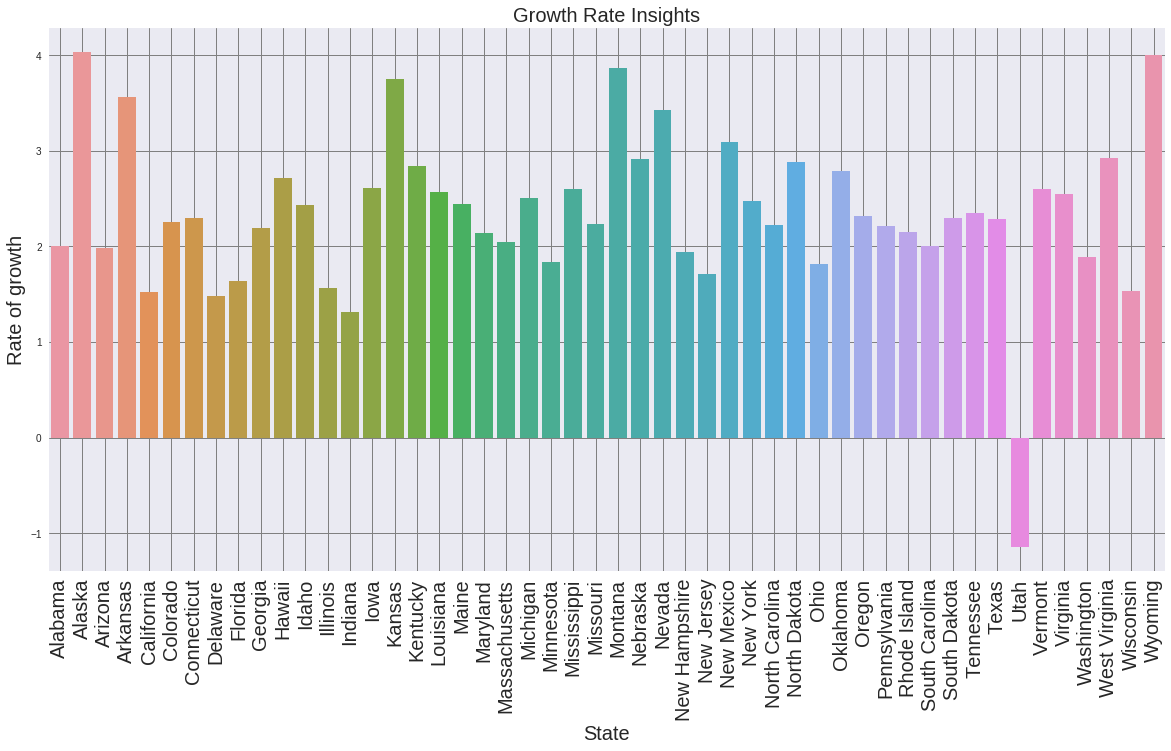

In [35]:
x = result['state']

# plot graph
plt.style.use('seaborn')
plt.figure(figsize = (20,10))
sns.barplot(x,result['gun_growth'])
plt.title('Growth Rate Insights',fontsize = 20)
plt.xlabel('State',fontsize = 20)
plt.ylabel('Rate of growth',fontsize = 20)
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize= 20)



#### Results for Question 3
>The number of gun registrations have increased in every state except Utah as indicated by the positive growth in gun registrations. Alaska has seen the highest growth in gun registrations with an increase of over 400%, followed by Wyoming, Montana, Kansas and Arkansas.

>This could indicate that these states are outliers or that there has been a shift towards increased reliance and trust in firearms, a decrease in trust in police institutions or an increase in safety concerns for various reasons.

### Research Question 4  (What is the overall trend of gun purchases?)

## Solution Process

>1. Create a function that creates line charts using grouped data by year ,month, which can be used to observe the change patten during the season
>2. Creates line charts using grouped data by MONTH
>3. Creates line charts using grouped data by YEAR

In [37]:
#Create a function that creates line charts using grouped data by year ,month, which can be used to observe the change patten 
#during the season

def plot_line_charts(df, date, columns):
    plt.figure(figsize=(20,10))
    for col in columns:
        df.groupby(date)[col].sum().plot(kind='line',label = col)
    plt.title(f'Overall trend per {date}',fontsize = 20)
    plt.xlabel('Time',fontsize = 20)
    plt.ylabel('Count',fontsize = 20)
    plt.legend(fontsize = 20)
    plt.show()

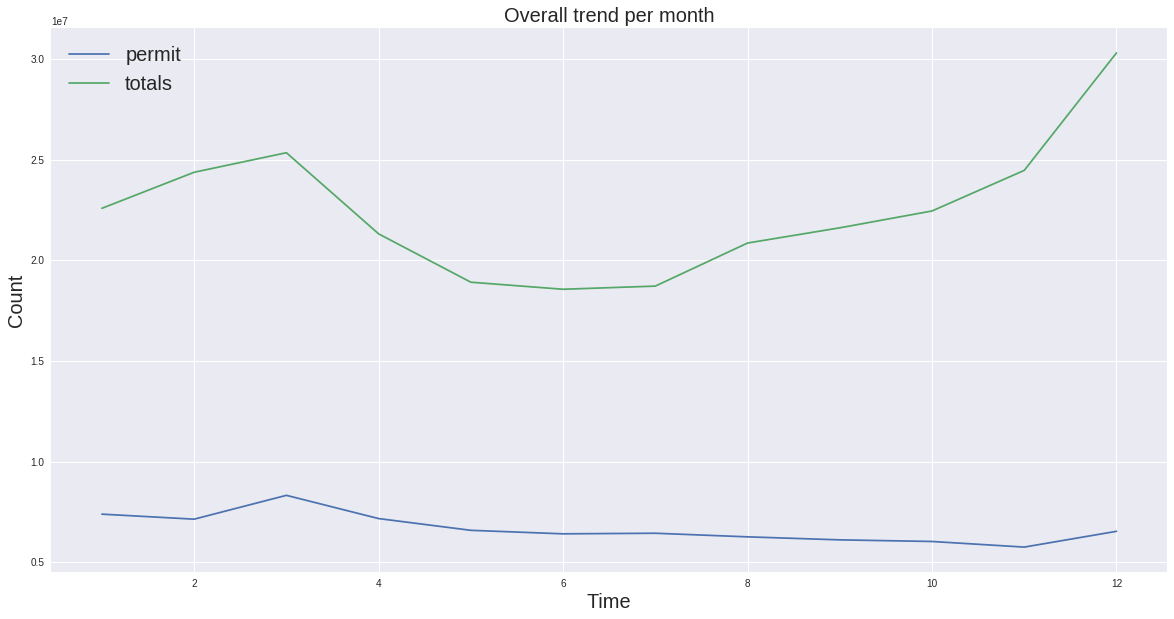

In [38]:
#Creates line charts using grouped data by MONTH
columns = ['permit', 'totals']
date = 'month'
plot_line_charts(gun_df_copy, date, columns)

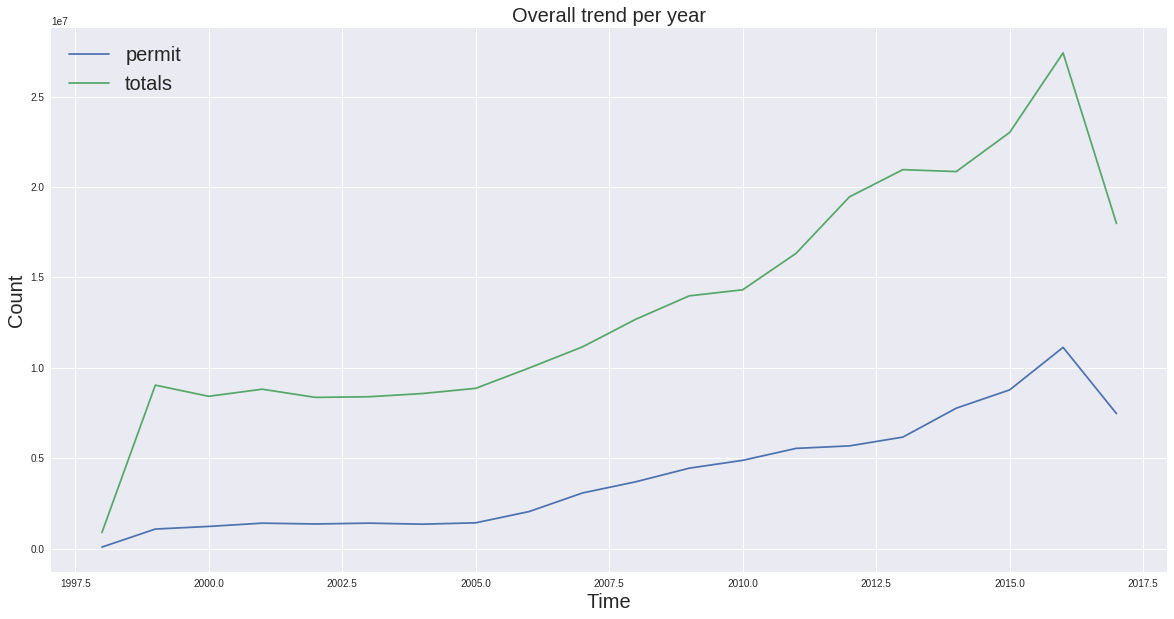

In [39]:
#Creates line charts using grouped data by YEAR
columns = ['permit', 'totals']
date = 'year'
plot_line_charts(gun_df_copy, date, columns)

#### Results for Question 4
>The line chart of gun sales over the years 1997-2016 shows a consistent upward trend in gun purchases, with sudden increases in the years 2015 and 1998 and a decrease in 2016. This decrease in 2016 may be partly attributed to the fact that data collection for that year is based on only 9 months.

<a id='conclusions'></a>
## Conclusions

> **Datasets Descriptions** :
The FBI Gun Data, US Census Data and Kaggle Gun Violence Data are three distinct datasets. The key feature that links them is the state variable, however, in order to gain accurate insights, it is necessary to clean the data by eliminating any missing values and unnecessary columns from the data.

>**In conclusion**, our analysis has provided insights into the relationship between census data and gun per capita, the growth of firearm background checks, the states with the highest growth in

### Questions to investigate 

>   1. What census data is most associated with high gun per capita?
>   2. How much have firearm background checks grown since 1999?
>   3. Which states have had the highest growth in gun registrations?
>   4. What is the overall trend of gun purchases?

### Limitations 
>In a dataset, missing or unspecified values can skew our understanding of a specific variable's long-term significance. Additionally, outliers can weaken the impact of other data points in calculations. Furthermore, non-standardized datasets can also be a problem.


### Result 
>In this analysis, we aimed to understand the relationship between census data and gun per capita, the growth of firearm background checks since 1999, the states with the highest growth in gun registrations, and the overall trend of gun purchases. Through our research, we found that there were weak associations between census data and gun per capita. Specifically, we found a positive association between gun per capita and variables such as White alone percent, Persons 65 years and over percent, and owner-occupied housing unit rate. On the other hand, we found a negative association between gun per capita and variables such as Asian alone percent, Foreign born persons percent, and Median gross rent.

>When we looked at the growth of firearm background checks since 1999, we found that Kentucky had the highest rate of background checks for guns since 1998. This can be attributed to the state's relatively lenient gun control laws compared to other states. For example, in Kentucky, there is no state permit required for purchasing firearms, no registration required for firearms, no laws regarding assault weapons or magazine capacity restrictions, and no owner license required. Additionally, background checks for private sales are not mandatory.

>We also found that the number of gun registrations have increased in every state except Utah as indicated by the positive growth in gun registrations. Alaska has seen the highest growth in gun registrations with an increase of over 400%. The trend of gun purchases is an increasing one with sudden increases in year 2015 and 1998 and decrease in 2016 which is partially due to data collection of only 9 months in that year.
